# PCA:
<p> PCA is sensitive to scale of the data, so before performing PCA it is important to scale ( standardize) the data.
<h1>7 Steps of PCA :</h1>
  <li> Standardize the data
  <li> Constuct the covariance matrix ( matrix of pair wise covariance of the features)
   <p>covariance between two features, x_j and x_k $$\sigma_{j k}=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{j}^{(i)}-\mu_{j}\right)\left(x_{k}^{(i)}-\mu_{k}\right)$$
 <p>$$\text{𝜇𝑗 and 𝜇𝑘 are the sample means of features j and k } $$
  Covariance matrix $$\Sigma=\left[\begin{array}{lll}
\sigma_{1}^{2} & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_{2}^{2} & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_{3}^{2}
\end{array}\right]$$
 An eigenvector,v, satisfies the following condition:
 $$\Sigma v=\lambda v$$
<li> Sort the eigen values in the decreasing order to rank the eigen vectors corresponding to them.
<li> Select desired 'k' eigen vectors, which corresponds to top k eigen values.
<li> Construct a projection matrix W, from the selected k eigen vectors
<li> Transform the d-dimensional input dataset X, using W to get new k-dimensional feature space. 
    $$x W=\mathbf{x^{'}}$$

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Let's use the wine data note that we already split the data into train and test before
X_train = pd.read_csv('X_train_df.csv')
X_test  = pd.read_csv('X_test_df.csv')
y_train = pd.read_csv('y_train_df.csv')
y_test  = pd.read_csv('y_test_df.csv')

In [3]:
#Converting to arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [4]:
y_train = y_train[:,1]
y_test = y_test[:,1]

In [5]:
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [6]:
covar_mat = np.cov(X_train.T)
eig_vals,eig_vecs = np.linalg.eig(covar_mat)

In [7]:
print("Eigen Values :", eig_vals)

Eigen Values : [4.72137798 2.56971933 1.53768883 1.05942142 0.91060705 0.79490072
 0.60392985 0.52685195 0.10050614 0.34911818 0.16704767 0.22311132
 0.26011637 0.27489395]


In [8]:
#let's sort these eigen values
indices = np.argsort(np.abs(eig_vals))
print(eig_vals[indices])

[0.10050614 0.16704767 0.22311132 0.26011637 0.27489395 0.34911818
 0.52685195 0.60392985 0.79490072 0.91060705 1.05942142 1.53768883
 2.56971933 4.72137798]


In [9]:
eig_vecs.shape

(14, 14)

In [10]:
#we got ascending order but we want descending order.
indices_ordered = indices[::-1]
print(eig_vals[indices_ordered])

[4.72137798 2.56971933 1.53768883 1.05942142 0.91060705 0.79490072
 0.60392985 0.52685195 0.34911818 0.27489395 0.26011637 0.22311132
 0.16704767 0.10050614]


# Explained covariance or( 1- information loss) :
$$\text { Explained variance ratio }=\frac{\lambda_{j}}{\sum_{j=1}^{d} \lambda_{j}}$$

In [11]:
total = sum(eig_vals) #sum of eigen vectors
var_explained = [(i/total) for i in eig_vals[indices_ordered]]
cdf_var = np.cumsum(var_explained) #cummulative sum of variance explained.

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.bar(range(1,15),var_explained,align='center',label = 'Individual explained variances',color='black')
plt.step(range(1,15),cdf_var,where='mid',label ='Cumulative explained variance',linestyle = '--')
plt.axhline(0.9,color='black',linestyle=':')
plt.axvline(8,color='black',linestyle=':')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 700x700 with 1 Axes>

In [15]:
eig_vecs_tr = eig_vecs.T

In [26]:
# from figure we can see that we'll get 90% of the info if project our data on to first 8 principal components
# To visualize let's just consider only 2 principal componets.
# so our transformation matrix is dX2 matrix

In [19]:
W = np.hstack((eig_vecs_tr[indices_ordered[0]][:,np.newaxis],eig_vecs_tr[indices_ordered[1]][:,np.newaxis]))

In [20]:
W.shape

(14, 2)

In [21]:
#Now let's transform entire train set using W
X_pca_train = X_train.dot(W)

In [22]:
X_pca_train.shape

(142, 2)

In [23]:
#Our transformed training set has 2 features # from plot u can see that almost 50% info is retrieved just by combing 1st 2 pcs
#Let's plot a scatter plot
def plot_scatter(X,y,colors,markers):

    for label,color,mark in zip(np.unique(y_train),colors,markers):
        plt.scatter(X[y==label, 0],X[y==label, 1],label=label,c=color,marker=mark)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.tight_layout()
    plt.show()

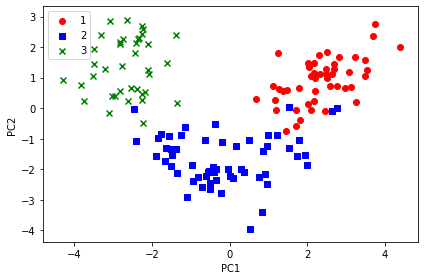

In [24]:
plot_scatter(X_pca_train,y_train,colors=['r','b','g'],markers=['o','s','x'])

# Using ScikitLearn to implement PCA:

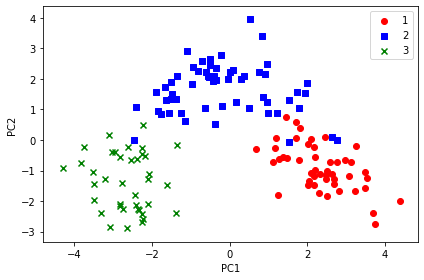

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_tr_pca = pca.fit_transform(X_train)
plot_scatter(X_tr_pca,y_train,colors=['r','b','g'],markers=['o','s','x'])